#### Name: Kefan Zheng
#### StudentId: 9086175008
#### Email: kzheng58@wisc.edu

# Problem 1-1

Define the following notations:  
$D_t$: Sales demand  
$n_t$: Number of snitches to produce during period $t$  
$i_t$: Increase in production rates between periods $t-1$ and $t$  
$d_t$: Decrease in production rates between periods $t-1$ and $t$  
$s_t$: Total inventory at end of period $t$  
$s1_t$: Number of snitches (up to 8000) at the end of period $t$  
$s2_t$: Number of snitches (over 8000) at the end of period $t$  

\begin{align}
\underset{n_t, i_t, d_t, s_{1t}, s_{2t}}{\min} \ & \sum_{t=1}^{6} (0.1n_t + 1.5i_t + 1d_t + 0.2s1_t + 0.5s2_t) & \\
\text{s.t.} \ & s_{t-1} + n_t - s_t = D_t &\\
& s_t = s1_t + s2_t &\\
& i_t >= n_t - n_{t-1} &\\
& d_t >= n_{t-1} - n_t &\\
& s1_t <= 8000 &\\
& s_0 = 2000 &\\
& n_0 = 4000 &\\
& n_t >= 0, i_t >= 0, d_t >= 0, s_t >= 0, s1_t >= 0, s2_t >= 0 &\\
\end{align}

# Problem 1-2

In [1]:
using JuMP, HiGHS

D = [4000 8000 20000 12000 6000 2000]               

m = Model(HiGHS.Optimizer)

@variable(m, n[0:6] >= 0)   
@variable(m, i[1:6] >= 0)        
@variable(m, d[1:6] >= 0) 
@variable(m, s[0:6] >= 0)
@variable(m, s1[1:6] >= 0)
@variable(m, s2[1:6] >= 0)

@constraint(m, n[0] == 4000)
@constraint(m, s[0] == 2000)
for t in 1:6
    @constraint(m, s[t-1] + n[t] - s[t] == D[t])
    @constraint(m, s1[t] + s2[t] == s[t])
    @constraint(m, s1[t] <= 8000)
    @constraint(m, i[t] >= n[t] - n[t-1])
    @constraint(m, d[t] >= n[t-1] - n[t]) 
end

@objective(m, Min, 0.1*sum(n[1:6]) + 1.5*sum(i) + 1*sum(d) + 0.2*sum(s1) + 0.5*sum(s2))      

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Optimal Strategy:")
for t in 1:6
    println("Month: ", t, ", Production: ", value(n[t]), ", Increase: ", value(i[t]),
        ", Decrease: ", value(d[t]), ", Total Inventory: ", value(s1[t])+value(s2[t]))
end
println("Optimal Cost: ", objective_value(m))
println()

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
23 rows, 35 cols, 67 nonzeros
17 rows, 29 cols, 65 nonzeros
17 rows, 29 cols, 65 nonzeros
Presolve : Reductions: rows 17(-15); columns 29(-9); elements 65(-15)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     1.0000000000e+03 Pr: 7(64000) 0s
         16     2.5266666667e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 16
Objective value     :  2.5266666667e+04
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Optimal Strategy:
Month: 1, Production: 10000.0, Increase: 6000.0, Decrease: 0.0, Total Inventory: 8000.0
Month: 2, Production: 10666.666666666666, Increase: 666.6666666666661, Decrease: 0.0, Total Inventory: 10666.666666666666
Month: 3, Production: 10666.666666666668, Increase: 0.0, Decrease: 0.0, Total Inve

# Problem 1-3

Add a variable:  
$b_t$: Number of backlogged demand at the end of period $t$

\begin{align}
\underset{n_t, i_t, d_t, s_{1t}, s_{2t}, b_t}{\min} \ & \sum_{t=1}^{6} (0.1n_t + 1.5i_t + 1d_t + 0.2s1_t + 0.5s2_t + 0.25b_t) & \\
\text{s.t.} \ & b_t = b_{t-1} + D_t - s_{t-1} - n_t + s_t &\\
& s_t = s1_t + s2_t &\\
& i_t >= n_t - n_{t-1} &\\
& d_t >= n_{t-1} - n_t &\\
& s1_t <= 8000 &\\
& s_0 = 2000 &\\
& n_0 = 4000 &\\
& b_0 = 0 &\\
& b_6 = 0 &\\
& n_t >= 0, i_t >= 0, d_t >= 0, s_t >= 0, s1_t >= 0, s2_t >= 0, b_t >= 0 &\\
\end{align}

# Problem 1-4

In [2]:
using JuMP, HiGHS

D = [4000 8000 20000 12000 6000 2000]            

m = Model(HiGHS.Optimizer)

@variable(m, n[0:6] >= 0)   
@variable(m, i[1:6] >= 0)        
@variable(m, d[1:6] >= 0) 
@variable(m, s[0:6] >= 0)
@variable(m, s1[1:6] >= 0)
@variable(m, s2[1:6] >= 0)
@variable(m, b[0:6] >= 0)

@constraint(m, n[0] == 4000)
@constraint(m, s[0] == 2000)
@constraint(m, b[0] == 0)
@constraint(m, b[6] == 0)
for t in 1:6
    @constraint(m, b[t] == b[t-1] + D[t] - s[t-1] - n[t] + s[t])
    @constraint(m, s1[t] + s2[t] == s[t])
    @constraint(m, s1[t] <= 8000)
    @constraint(m, i[t] >= n[t] - n[t-1])
    @constraint(m, d[t] >= n[t-1] - n[t]) 
end

@objective(m, Min, 0.1*sum(n[1:6]) + 1.5*sum(i) + 1*sum(d) + 0.2*sum(s1) + 0.5*sum(s2) + 0.25*sum(b))      

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Optimal production levels and backlog levels:")
for t in 1:6
    println("Month ", t, ": Production = ", value(n[t]), ", Backlog = ", value(b[t]))
end
println("Optimal Cost: ", objective_value(m))
println()



Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
24 rows, 41 cols, 79 nonzeros
18 rows, 35 cols, 72 nonzeros
18 rows, 35 cols, 72 nonzeros
Presolve : Reductions: rows 18(-16); columns 35(-10); elements 72(-22)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 7(54000) 0s
         14     1.9100000000e+04 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 14
Objective value     :  1.9100000000e+04
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Optimal production levels and backlog levels:
Month 1: Production = 8333.333333333334, Backlog = 0.0
Month 2: Production = 8333.333333333332, Backlog = 0.0
Month 3: Production = 8333.333333333332, Backlog = 4999.999999999998
Month 4: Production = 8333.333333333334, Backlog = 8666.666666666668
Month 5: Produc

# Problem 2-1

Define the following notations:  
If $expression_{left} - expression_{right} \geq 0$, then $u_i \geq 0, v_i = 0$   
If $expression_{left} - expression_{right} \lt 0$, then $u_i = 0, v_i \gt 0$

\begin{align}
\underset{u_i, v_i}{\min} \ & \sum_{t=1}^{6} (u_i + v_i) & \\
\text{s.t.} \ & 8x_1 - 2x_2 + 4x_3 - 9x_4 - 17 = u_1 - v_1 &\\
& x_1 + 6x_2 - x_3 - 5x_4 - 16 = u_2 - v_2 &\\
& x_1 - x_2 + x_3 - 7 = u_3 - v_3 &\\
& x_1 + 2x_2 - 7x_3 + 4x_4 - 15 = u_4 - v_4 &\\
& x_3 - x_4 - 6 = u_5 - v_5 &\\
& x_1 + x_3 - x_4 = u_6 - v_6 &\\
& u_i \geq 0, v_i \geq 0 \quad \forall i \in \{1, 2, 3, 4, 5, 6\} &\\
\end{align}

# Problem 2-2

In [3]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[1:4])
@variable(m, u[1:6] >= 0)
@variable(m, v[1:6] >= 0)

@constraint(m, 8x[1] - 2x[2] + 4x[3] - 9x[4] - 17 == u[1] - v[1])
@constraint(m, x[1] + 6x[2] - x[3] - 5x[4] -16 == u[2] - v[2])
@constraint(m, x[1] - x[2] + x[3] - 7 == u[3] - v[3])
@constraint(m, x[1] + 2x[2] - 7x[3] + 4x[4] - 15 == u[4] - v[4])
@constraint(m, x[3] - x[4] - 6 == u[5] - v[5])
@constraint(m, x[1] + x[3] - x[4] == u[6] - v[6])

@objective(m, Min, sum(u) + sum(v))

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Minimum total residual: ", objective_value(m))
println("Values of x:")
println("x1: ", value(x[1]))
println("x2: ", value(x[2]))
println("x3: ", value(x[3]))
println("x4: ", value(x[4]))

println()

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
6 rows, 16 cols, 32 nonzeros
6 rows, 16 cols, 32 nonzeros
Presolve : Reductions: rows 6(-0); columns 16(-0); elements 32(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 5(77.5); Du: 0(3.12613e-12) 0s
          6     1.5419161677e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 6
Objective value     :  1.5419161677e+01
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Minimum total residual: 15.41916167664671
Values of x:
x1: 9.419161676646711
x2: 8.023952095808388
x3: 5.6047904191616835
x4: 7.191616766467074



# Problem 2-3

In [4]:
# Verify

using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[1:4])
@variable(m, r[1:6] >= 0)

@constraint(m, r[1] >= 8x[1] - 2x[2] + 4x[3] - 9x[4] - 17)
@constraint(m, r[1] >= -(8x[1] - 2x[2] + 4x[3] - 9x[4] - 17))
@constraint(m, r[2] >= x[1] + 6x[2] - x[3] - 5x[4] - 16)
@constraint(m, r[2] >= -(x[1] + 6x[2] - x[3] - 5x[4] - 16))
@constraint(m, r[3] >= x[1] - x[2] + x[3] - 7)
@constraint(m, r[3] >= -(x[1] - x[2] + x[3] - 7))
@constraint(m, r[4] >= x[1] + 2x[2] - 7x[3] + 4x[4] - 15)
@constraint(m, r[4] >= -(x[1] + 2x[2] - 7x[3] + 4x[4] - 15))
@constraint(m, r[5] >= x[3] - x[4] - 6)
@constraint(m, r[5] >= -(x[3] - x[4] - 6))
@constraint(m, r[6] >= x[1] + x[3] - x[4])
@constraint(m, r[6] >= -(x[1] + x[3] - x[4]))

@objective(m, Min, sum(r))

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Minimum total residual: ", objective_value(m))
println("Values of x:")
println("x1: ", value(x[1]))
println("x2: ", value(x[2]))
println("x3: ", value(x[3]))
println("x4: ", value(x[4]))

println()

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
12 rows, 10 cols, 52 nonzeros
12 rows, 10 cols, 52 nonzeros
Presolve : Reductions: rows 12(-0); columns 10(-0); elements 52(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 5(77.5); Du: 0(2.46407e-12) 0s
          6     1.5419161677e+01 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 6
Objective value     :  1.5419161677e+01
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Minimum total residual: 15.41916167664671
Values of x:
x1: 9.419161676646711
x2: 8.023952095808388
x3: 5.6047904191616835
x4: 7.191616766467074



Yes, this is a correct model for the problem. In my model, I use a pair of variables, one positive and one negative, to catch the residuals, while this model use a single variable but more constraints to represent the residuals. 

# Problem 2-4

\begin{align}
\underset{max\_residual}{\min} \ & max\_residual & \\
\text{s.t.} \ & 8x_1 - 2x_2 + 4x_3 - 9x_4 - 17 = u_1 - v_1 &\\
& x_1 + 6x_2 - x_3 - 5x_4 - 16 = u_2 - v_2 &\\
& x_1 - x_2 + x_3 - 7 = u_3 - v_3 &\\
& x_1 + 2x_2 - 7x_3 + 4x_4 - 15 = u_4 - v_4 &\\
& x_3 - x_4 - 6 = u_5 - v_5 &\\
& x_1 + x_3 - x_4 = u_6 - v_6 &\\
& u_i \geq 0, v_i \geq 0, max\_residual \geq u_i + v_i \quad \forall i \in \{1, 2, 3, 4, 5, 6\} &\\
\end{align}

# Problem 2-5

In [5]:
# Verify

using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, max_residual >= 0)
# @variable(m, x[1:4] >= 0)
@variable(m, x[1:4])
@variable(m, r[1:6] >= 0)

# @constraint(m, r[1] == 8x[1] - 2x[2] + 4x[3] - 9x[4] - 17)
# @constraint(m, r[2] == x[1] + 6x[2] - x[3] - 5x[4] - 16)
# @constraint(m, r[3] == x[1] - x[2] + x[3] - 7)
# @constraint(m, r[4] == x[1] + 2x[2] - 7x[3] + 4x[4] - 15)
# @constraint(m, r[5] == x[3] - x[4] - 6)
# @constraint(m, r[6] == x[1] + x[3] - x[4])
@constraint(m, r[1] >= 8x[1] - 2x[2] + 4x[3] - 9x[4] - 17)
@constraint(m, r[1] >= -(8x[1] - 2x[2] + 4x[3] - 9x[4] - 17))
@constraint(m, r[2] >= x[1] + 6x[2] - x[3] - 5x[4] - 16)
@constraint(m, r[2] >= -(x[1] + 6x[2] - x[3] - 5x[4] - 16))
@constraint(m, r[3] >= x[1] - x[2] + x[3] - 7)
@constraint(m, r[3] >= -(x[1] - x[2] + x[3] - 7))
@constraint(m, r[4] >= x[1] + 2x[2] - 7x[3] + 4x[4] - 15)
@constraint(m, r[4] >= -(x[1] + 2x[2] - 7x[3] + 4x[4] - 15))
@constraint(m, r[5] >= x[3] - x[4] - 6)
@constraint(m, r[5] >= -(x[3] - x[4] - 6))
@constraint(m, r[6] >= x[1] + x[3] - x[4])
@constraint(m, r[6] >= -(x[1] + x[3] - x[4]))
@constraint(m, max_residual >= r[1])
@constraint(m, max_residual >= r[2])
@constraint(m, max_residual >= r[3])
@constraint(m, max_residual >= r[4])
@constraint(m, max_residual >= r[5])
@constraint(m, max_residual >= r[6])

@objective(m, Min, max_residual)

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Minimum max-residual: ", objective_value(m))
println("Values of x:")
println("x1: ", value(x[1]))
println("x2: ", value(x[2]))
println("x3: ", value(x[3]))
println("x4: ", value(x[4]))

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
18 rows, 11 cols, 64 nonzeros
15 rows, 8 cols, 58 nonzeros
13 rows, 6 cols, 54 nonzeros
12 rows, 5 cols, 52 nonzeros
Presolve : Reductions: rows 12(-6); columns 5(-6); elements 52(-12)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 5(65.5); Du: 0(6.5397e-12) 0s
          7     5.9344262295e+00 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 7
Objective value     :  5.9344262295e+00
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Minimum max-residual: 5.934426229508197
Values of x:
x1: 4.000000000000005
x2: 3.47540983606558
x3: 0.540983606557383
x4: 0.4754098360655796


No, it's not a correct model.  
There are several problems:  
1. In this model, the decision variable $x_i$ is constrained to be non-negative, but in fact $x_i$ can be negative. We should remove the range restriction of $x_i$
2. The decision variable $r_i$ does not represent the real residual. Change the model to the following:
   \begin{align}
    \underset{}{\min} \ & max\_residual & \\
    \text{s.t.} \ & r_1 \geq 8x_1 - 2x_2 + 4x_3 - 9x_4 - 17 &\\
   & r_1 \geq -(8x_1 - 2x_2 + 4x_3 - 9x_4 - 17) &\\
    & r_2 \geq x_1 + 6x_2 - x_3 - 5x_4 - 16 &\\
   & r_2 \geq -(x_1 + 6x_2 - x_3 - 5x_4 - 16) &\\
    & r_3 \geq x_1 - x_2 + x_3 - 7 &\\
   & r_3 \geq -(x_1 - x_2 + x_3 - 7) &\\
    & r_4 \geq x_1 + 2x_2 - 7x_3 + 4x_4 - 15 &\\
   & r_4 \geq -(x_1 + 2x_2 - 7x_3 + 4x_4 - 15) &\\
    & r_5 \geq x_3 - x_4 - 6 &\\
   & r_5 \geq -(x_3 - x_4 - 6) &\\
    & r_6 \geq x_1 + x_3 - x_4 &\\
   & r_6 \geq -(x_1 + x_3 - x_4) &\\
    & max\_residual \geq r_1 &\\
   & max\_residual \geq r_2 &\\
   & max\_residual \geq r_3 &\\
   & max\_residual \geq r_4 &\\
   & max\_residual \geq r_5 &\\
   & max\_residual \geq r_6 &\\
    & r_1,r_2,r_3,r_4,r_5,r_6,max\_residual \geq 0 &\\
    \end{align}

# Problem 2-6

In [6]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

# k = max(r1, ..., r6)
@variable(m, k >= 0)
@variable(m, x[1:4])
@variable(m, u[1:6] >= 0)
@variable(m, v[1:6] >= 0)

@constraint(m, 8x[1] - 2x[2] + 4x[3] - 9x[4] - 17 == u[1] - v[1])
@constraint(m, x[1] + 6x[2] - x[3] - 5x[4] -16 == u[2] - v[2])
@constraint(m, x[1] - x[2] + x[3] - 7 == u[3] - v[3])
@constraint(m, x[1] + 2x[2] - 7x[3] + 4x[4] - 15 == u[4] - v[4])
@constraint(m, x[3] - x[4] - 6 == u[5] - v[5])
@constraint(m, x[1] + x[3] - x[4] == u[6] - v[6])
for i in 1:6
    @constraint(m, k >= u[i] + v[i])
end

@objective(m, Min, k)

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Minimum max-residual: ", objective_value(m))
println("Values of x:")
println("x1: ", value(x[1]))
println("x2: ", value(x[2]))
println("x3: ", value(x[3]))
println("x4: ", value(x[4]))

println()

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
12 rows, 17 cols, 50 nonzeros
12 rows, 17 cols, 50 nonzeros
Presolve : Reductions: rows 12(-0); columns 17(-0); elements 50(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 5(65.5); Du: 0(1.9623e-12) 0s
         12     5.9344262295e+00 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 12
Objective value     :  5.9344262295e+00
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Minimum max-residual: 5.934426229508205
Values of x:
x1: 3.999999999999996
x2: 3.47540983606557
x3: 0.5409836065573668
x4: 0.4754098360655684



# Problem 3-1

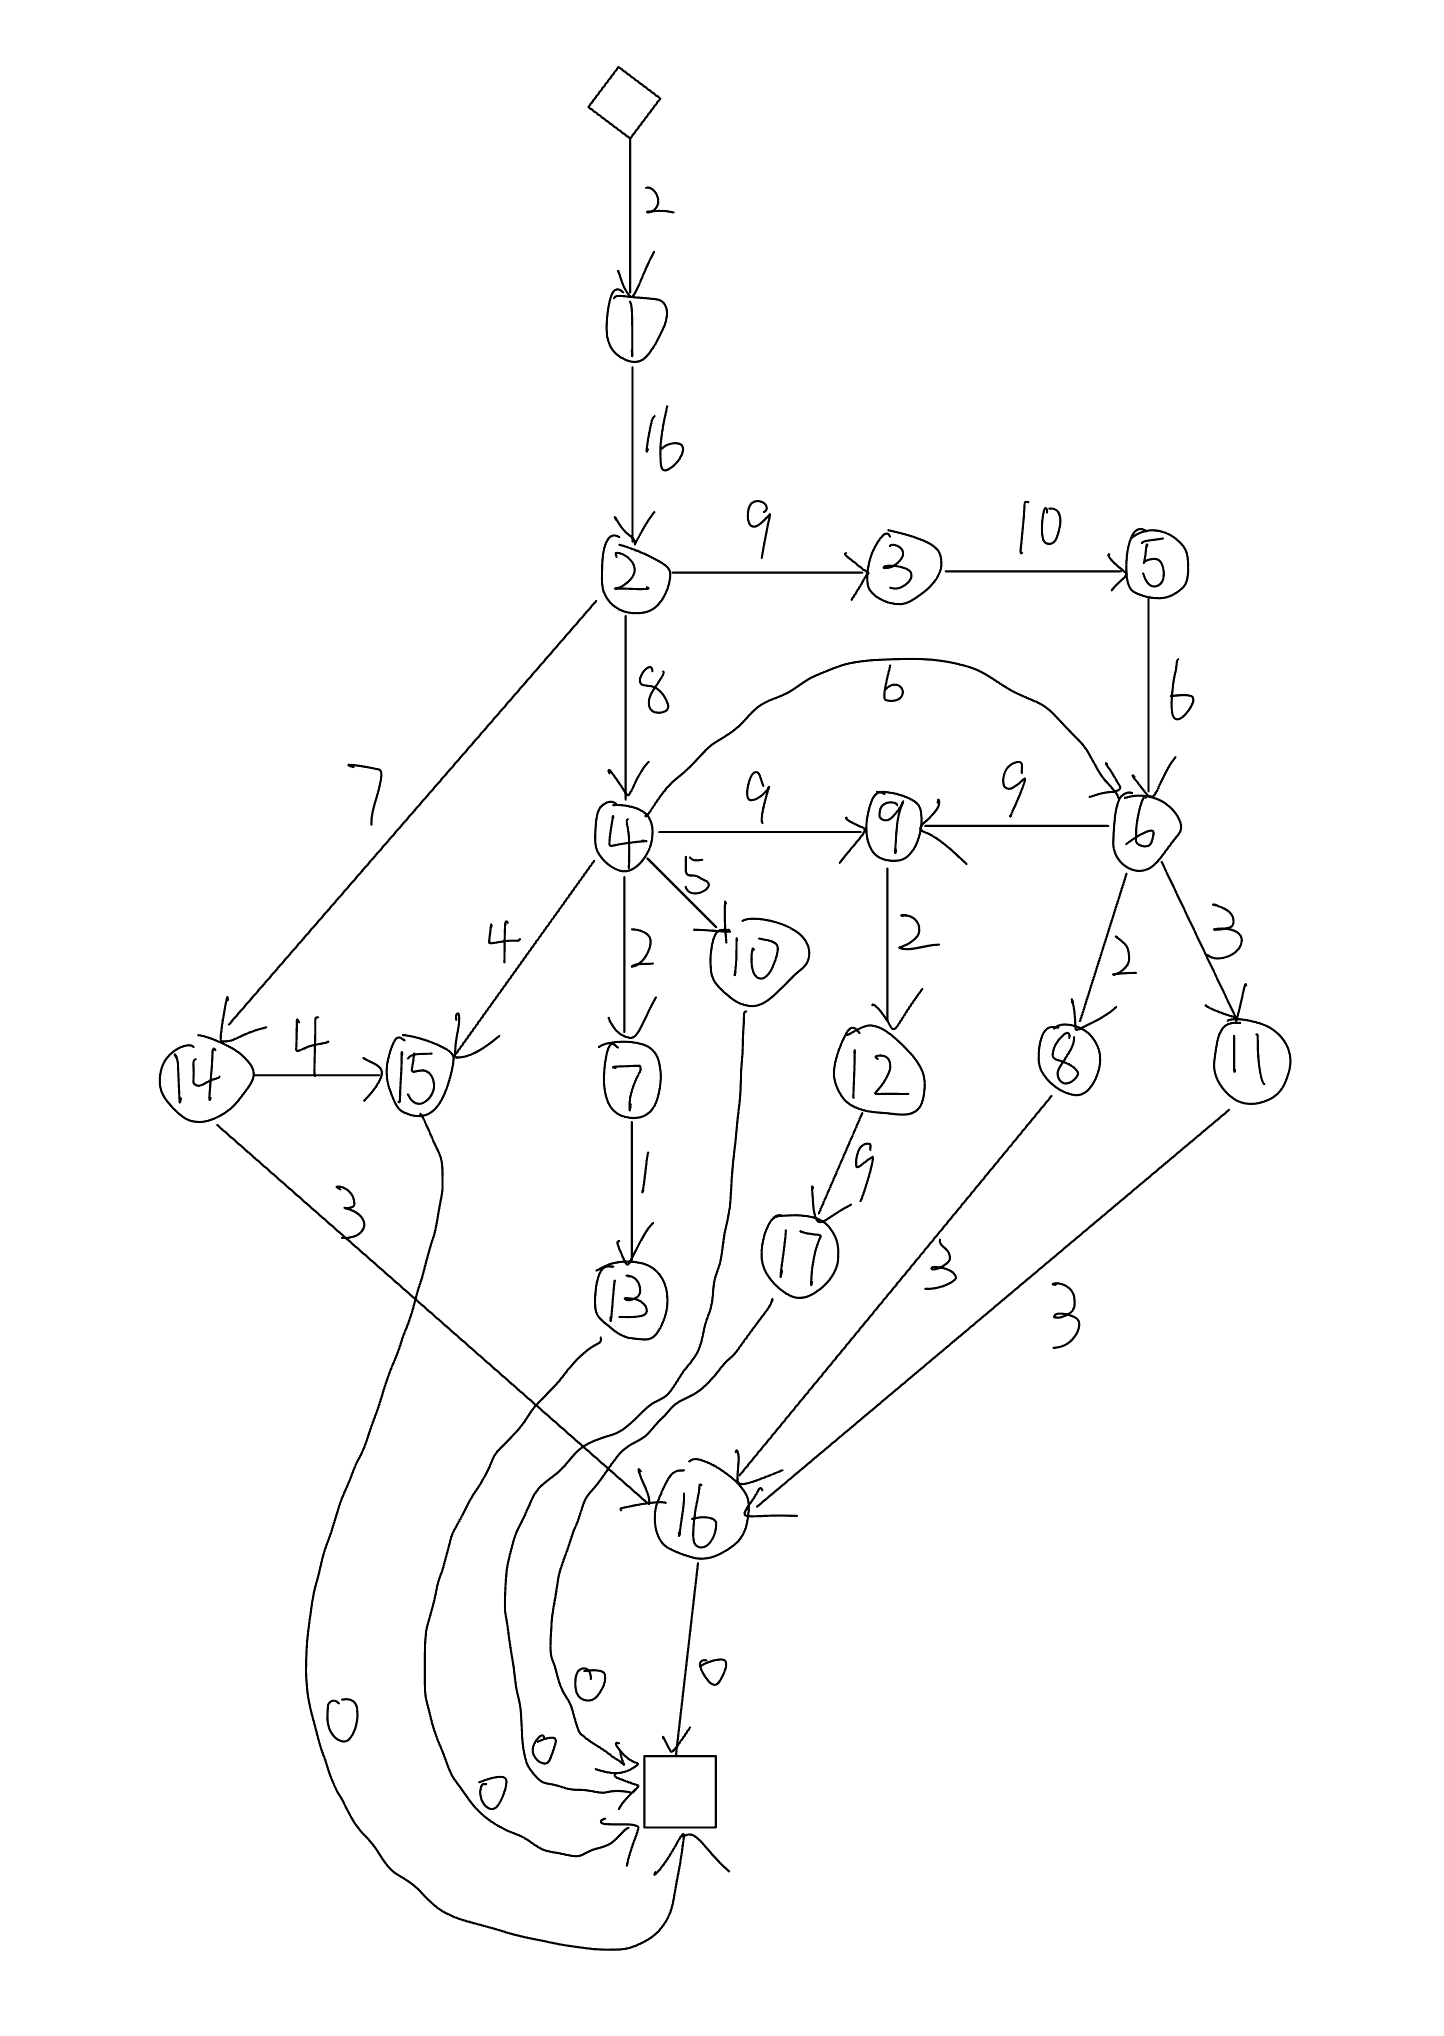

# Problem 3-2

\begin{align}
\text{Minimize} \ & \quad Z  & \\
\text{s.t.} \ & x_j \geq x_i + d_i, \quad \forall (j, i) \in P &\\
& Z \geq x_t + d_t, \quad \forall t \in T &\\
& x_t \geq 0, \quad \forall t \in T &\\
\end{align}

# Problem 3-3

In [7]:
tasks = 1:17
durations = [2 16 9 8 10 6 2 2 9 5 3 2 1 7 4 3 9]
predecessors = ( [], [1], [2], [2], [3], [4,5], [4], [6], [4,6], [4], [6], [9], [7], [2], [4,14], [8,11,14], [12])
pred_dict = Dict(zip(tasks,predecessors));   # dictionary mapping tasks --> predecessors.

# additional columns of data (maximum reduction possible )
max_reduction =  [0,  3,  1,  2,  2,  1, 1, 0,  2,  1,  1, 0, 0,  2,  2, 1,  3]  # max reduction (in weeks)
cost_reduction = [0, 30, 26, 12, 17, 15, 8, 0, 42, 21, 18, 0, 0, 22, 12, 6, 16]  # cost of reduction ($1,000/week)
bonus_amount = 30     # bonus for expediting the project ($1,000/week )
;

d = durations
pred_dict

Dict{Int64, Vector} with 17 entries:
  5  => [3]
  16 => [8, 11, 14]
  7  => [4]
  12 => [9]
  8  => [6]
  17 => [12]
  1  => Any[]
  4  => [2]
  6  => [4, 5]
  13 => [7]
  2  => [1]
  10 => [4]
  11 => [6]
  9  => [4, 6]
  15 => [4, 14]
  14 => [2]
  3  => [2]

In [8]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x[tasks])
@variable(m, Z >= 0)

start_constraints = Dict()
completion_constraints = Dict()
precedence_constraints = Dict()
for t in tasks
    c = @constraint(m, x[t] >= 0)
    start_constraints[t] = c
    c = @constraint(m, Z >= x[t] + d[t])
    completion_constraints[t] = c
    for p in pred_dict[t]
        c = @constraint(m, x[t] >= x[p] + d[p])
        precedence_constraints[(t, p)] = c
    end
end

@objective(m, Min, Z)

optimize!(m)

println("Solver terminated with status ", termination_status(m))
println("Minimum project completion weeks: ", objective_value(m))
for t in tasks
    println("Start time for task ", t, ": ", value(x[t]))
end
println()
println("Dual variables for start_constraints:")
for t in tasks
    if dual(start_constraints[t]) != 0
        println("Task ", t, " start time constraints dual variable: ", dual(start_constraints[t]))
    end
end
println()
println("Dual variables for completion_constraints:")
for t in tasks
    if dual(completion_constraints[t]) != 0
        println("Task ", t, " completion constraints dual variable: ", dual(completion_constraints[t]))
    end
end
println()
println("Dual variables for precedence_constraints:")
for (t, p) in keys(precedence_constraints)
    if dual(precedence_constraints[(t, p)]) != 0
        println("Task ", t, " depends on task ", p, ": ", dual(precedence_constraints[(t, p)]))
    end
end

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
3 rows, 1 cols, 3 nonzeros
0 rows, 0 cols, 0 nonzeros
Presolve : Reductions: rows 0(-55); columns 0(-18); elements 0(-93) - Reduced to empty
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Objective value     :  6.3000000000e+01
HiGHS run time      :          0.00
Solver terminated with status OPTIMAL
Minimum project completion weeks: 63.0
Start time for task 1: -0.0
Start time for task 2: 2.0
Start time for task 3: 18.0
Start time for task 4: 18.0
Start time for task 5: 27.0
Start time for task 6: 37.0
Start time for task 7: 26.0
Start time for task 8: 43.0
Start time for task 9: 43.0
Start time for task 10: 26.0
Start time for task 11: 43.0
Start time for task 12: 52.0
Start time for task 13: 28.0
Start time for task 14: 18.0
Start time for task 15: 26.0
Start time for task 16: 46.0
Start time for task 17: 54.0

Dual variables for start_constraints:
Task 1 st

# Problem 3-4

According to the knowledge of complementary slackness, if the dual variable value of a task's primal constraint is not zero, it means that this primal constraint is tight, and extending (or shortening) the task will affect the completion time of the entire project, that is, the task is on the critical path.

In [9]:
println("Critical Path Activities:")
s = Set([])
for t in tasks
    if dual(start_constraints[t]) != 0 || dual(completion_constraints[t]) != 0
        push!(s, t)
    end
    for p in pred_dict[t]
        if dual(precedence_constraints[(t, p)]) != 0
            push!(s, t)
        end
    end
end

s = sort(collect(s))
for element in s
    println("Task ", element, " is on the critical path")
end

Critical Path Activities:
Task 1 is on the critical path
Task 2 is on the critical path
Task 3 is on the critical path
Task 5 is on the critical path
Task 6 is on the critical path
Task 9 is on the critical path
Task 12 is on the critical path
Task 17 is on the critical path


# Problem 4-1

Define the following notations:  
$κ$: The cost of transporting a broom from one location to another  
$d_{ij}$: The distance between any pair of locations  
$x_{ij}$: The number of brooms transported from one location to another  
$r_i$: Required number of brooms  
$c_i$: Current number of brooms  

\begin{align}
\text{Minimize} \ & \quad Z = \sum_{i \in I} \sum_{j \in I, j \neq i} (κ * d_{ij} * x_{ij}) & \\
\text{s.t.} \ & \sum_{j \in I,j \neq i}x_{ji} - \sum_{j \in I,j \neq i}x_{ij} = r_i - c_i, \forall i \in I &\\
& x_{ij} \geq 0, \forall i,j \in I, i \neq j &\\
\end{align}

# Problem 4-2

In [10]:
using JuMP, HiGHS

I = 1:10
x = [0, 20, 18, 30, 35, 33, 5, 5, 11, 2]
y = [0, 20, 10, 12, 0, 25, 27, 10, 0, 15]
current_brooms = [8, 13, 4, 8, 12, 2, 14, 11, 15, 7]
required_brooms = [10, 6, 8, 11, 9, 7, 15, 7, 9, 12]
κ = 0.5
d = [sqrt((x[i]- x[j])^2 + (y[i]-y[j])^2) for i in I, j in I]

m = Model(HiGHS.Optimizer)

@variable(m, x[I, I] >= 0)

for i in 1:10
    @constraint(m, sum(x[j, i] for j in I) - sum(x[i, j] for j in I) == required_brooms[i] - current_brooms[i])
end

@objective(m, Min, sum(κ * x[i, j] * d[i, j] for i in I for j in I))

optimize!(m)

println("Minimum cost:", objective_value(m))
total = 0
for i in I
    for j in I
        total += value(x[i, j])
        println("Transport $(value(x[i,j])) brooms from $(i) to $(j)")
    end
end
println("Total number of brooms to transport: ", total)
println()

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
10 rows, 90 cols, 180 nonzeros
9 rows, 90 cols, 162 nonzeros
Presolve : Reductions: rows 9(-1); columns 90(-10); elements 162(-18)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Pr: 9(35) 0s
          9     1.1741462794e+02 Pr: 0(0); Du: 0(1.77636e-15) 0s
Solving the original LP from the solution after postsolve
Model   status      : Optimal
Simplex   iterations: 9
Objective value     :  1.1741462794e+02
HiGHS run time      :          0.00
Minimum cost:117.41462794073561
Transport 0.0 brooms from 1 to 1
Transport 0.0 brooms from 1 to 2
Transport 0.0 brooms from 1 to 3
Transport 0.0 brooms from 1 to 4
Transport 0.0 brooms from 1 to 5
Transport 0.0 brooms from 1 to 6
Transport 0.0 brooms from 1 to 7
Transport 0.0 brooms from 1 to 8
Transport 0.0 brooms from 1 to 9
Transport 0.0 brooms from 1 to 1

# Problem 5-1

Primal linear programs
\begin{align}
\text{Maximize} \ & \quad 5x_1 + 8x_2 & \\
\text{s.t.} \ 
& 3x_1 + 2x_2 \leq 160 &\\
& x_1 + 4x_2 \leq 200 &\\
& x_1, x_2 \geq 0 &\\
\end{align}  

Dual linear program
\begin{align}
\text{Minimize} \ & \quad 160y_1 + 200y_2 & \\
\text{s.t.} \
& 3y_1 + y_2 \geq 5 &\\
& 2y_1 + 4y_2 \geq 8 &\\
& y_1, y_2 \geq 0 &\\
\end{align}  

# Problem 5-2

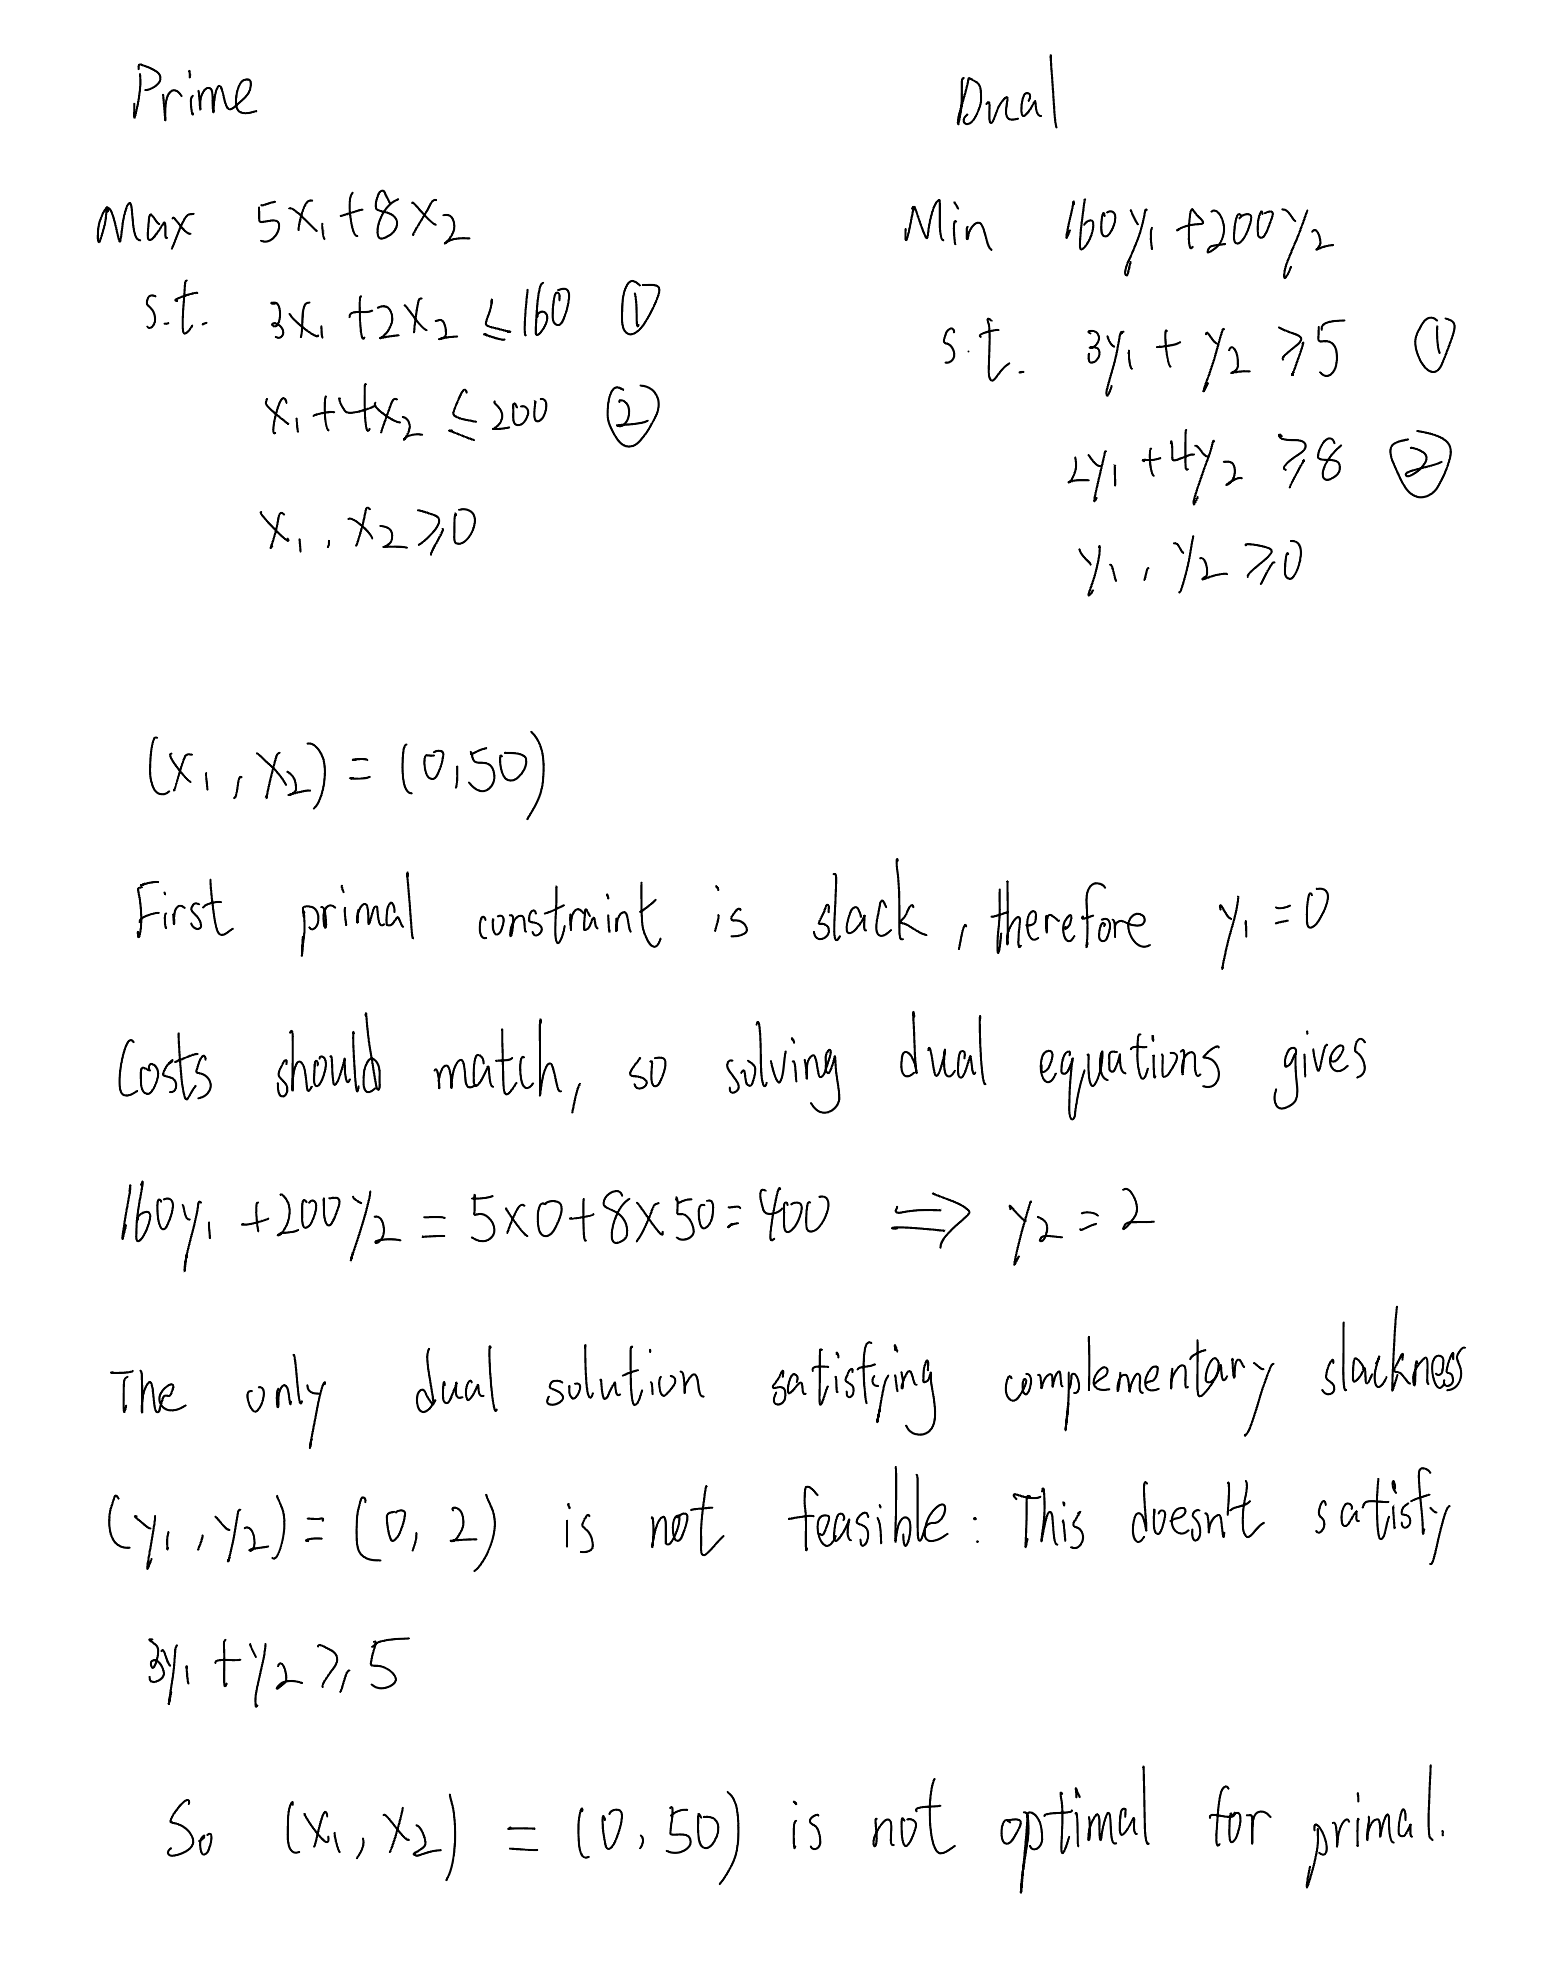

# Problem 5-3

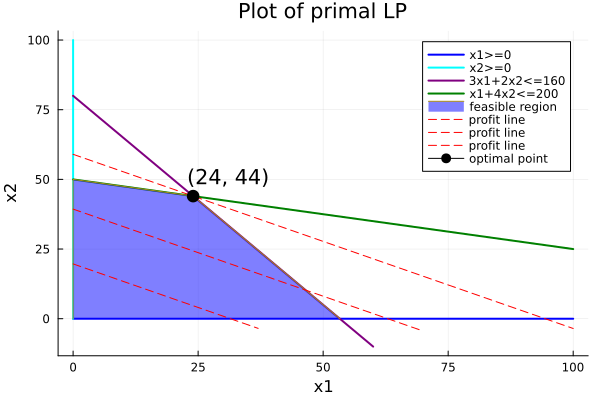

In [11]:
using Plots

# constraints
Plots.plot([0, 100], [0, 0], color="blue", linewidth=2, label="x1>=0")
Plots.plot!([0, 0], [0, 100], color="cyan", linewidth=2, label="x2>=0")

x1 = range(0, 60, 2)
x2 = (160 .- 3 .* x1) ./ 2
Plots.plot!(x1, x2, color="purple", linewidth=2, label="3x1+2x2<=160")

x1 = range(0, 100, 2)
x2 = (200 .- x1) ./ 4
Plots.plot!(x1, x2, color="green", linewidth=2, label="x1+4x2<=200")

# feasible set
x1 = [0, 0, 24, 160/3]
x2 = [0, 50, 44, 0]
Plots.plot!(x1, x2, fill=(0, 0.5, :blue), label="feasible region")

# profit line
p = 472
x1 = range(0, 100, 2)
x2 = (p .- 5 .* x1) ./ 8
Plots.plot!(x1, x2, color="red", linestyle=:dash, label="profit line")

p = 472 / 3 * 2
x1 = range(0, 70, 2)
x2 = (p .- 5 .* x1) ./ 8
Plots.plot!(x1, x2, color="red", linestyle=:dash, label="profit line")

p = 472 / 3
x1 = range(0, 37, 2)
x2 = (p .- 5 .* x1) ./ 8
Plots.plot!(x1, x2, color="red", linestyle=:dash, label="profit line")

# optimal point
Plots.plot!([24], [44], color="black", marker=:circle, markersize=7, label="optimal point")
Plots.annotate!(31, 51, "(24, 44)", color="black")

Plots.title!("Plot of primal LP")
Plots.xlabel!("x1")
Plots.ylabel!("x2")

In [12]:
x1, x2 = 24, 44
obj = 5x1+8x2
println("Optimal Point: (x1, x2) = ", (x1, x2))
println("Optimal Objective: ", obj)

Optimal Point: (x1, x2) = (24, 44)
Optimal Objective: 472


# Problem 5-4

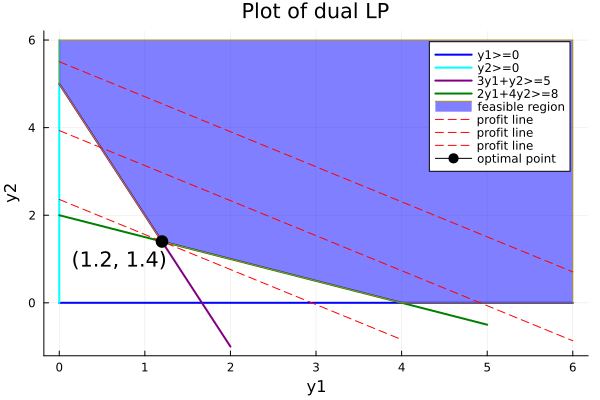

In [13]:
using Plots

# constraints
Plots.plot([0, 6], [0, 0], color="blue", linewidth=2, label="y1>=0", legend=:topright)
Plots.plot!([0, 0], [0, 6], color="cyan", linewidth=2, label="y2>=0")

y1 = range(0, 2)
y2 = (5 .- 3 .* y1)
Plots.plot!(y1, y2, color="purple", linewidth=2, label="3y1+y2>=5")

y1 = range(0, 5)
y2 = (8 .- 2 .* y1) ./ 4
Plots.plot!(y1, y2, color="green", linewidth=2, label="2y1+4y2>=8")

# feasible set
y1 = [0, 0, 1.2, 4, 6, 6, 0]
y2 = [6, 5, 1.4, 0, 0, 6, 6]
Plots.plot!(y1, y2, fill=(0, 0.5, :blue), label="feasible region")

# profit line
p = 472
y1 = range(0, 4)
y2 = (p .- 160 .* y1) ./ 200
Plots.plot!(y1, y2, color="red", linestyle=:dash, label="profit line")

p = 472 / 3 * 5
y1 = range(0, 6)
y2 = (p .- 160 .* y1) ./ 200
Plots.plot!(y1, y2, color="red", linestyle=:dash, label="profit line")

p = 472 / 3 * 7
y1 = range(0, 6)
y2 = (p .- 160 .* y1) ./ 200
Plots.plot!(y1, y2, color="red", linestyle=:dash, label="profit line")

# optimal point
Plots.plot!([1.2], [1.4], color="black", marker=:circle, markersize=7, label="optimal point")
Plots.annotate!(0.7, 1, "(1.2, 1.4)", color="black")

Plots.title!("Plot of dual LP")
Plots.xlabel!("y1")
Plots.ylabel!("y2")

In [14]:
y1, y2 = 1.2, 1.4
obj = 160y1+200y2
println("Optimal Point: (y1, y2) = ", (y1, y2))
println("Optimal Objective: ", obj)

Optimal Point: (y1, y2) = (1.2, 1.4)
Optimal Objective: 472.0


# Problem 5-5

In [15]:
using JuMP, HiGHS

m = Model(HiGHS.Optimizer)

@variable(m, x1 >= 0)
@variable(m, x2 >= 0)

@constraint(m, 3x1 + 2x2 <= 160)
@constraint(m, boxwood_constraint, x1 + 4x2 <= 200)

@objective(m, Max, 5x1 + 8x2)

optimize!(m)

println("Maximum profit:", objective_value(m))
println("The shadow price of boxwood constraint is: ", shadow_price(boxwood_constraint))
println()
println("Answer:")
println("The shadow price corresponding to the boxwood constraint is 1.4, which means that for every additional 1kg of boxwood, 
the profit will increase by 1.4\$. Therefore, as long as the price of an extra kg of boxwood is less than 1.4\$, 
then ViditChess’s owner AnishGiri can make a profit by buying extra boxwood. So, the maximum amount that he should 
be willing to pay for an extra kg of boxwood is 1.4\$.")

Running HiGHS 1.6.0: Copyright (c) 2023 HiGHS under MIT licence terms
Presolving model
2 rows, 2 cols, 4 nonzeros
2 rows, 2 cols, 4 nonzeros
Presolve : Reductions: rows 2(-0); columns 2(-0); elements 4(-0) - Not reduced
Problem not reduced by presolve: solving the LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0    -1.2999988697e+01 Ph1: 2(10); Du: 2(13) 0s
          2     4.7200000000e+02 Pr: 0(0) 0s
Model   status      : Optimal
Simplex   iterations: 2
Objective value     :  4.7200000000e+02
HiGHS run time      :          0.00
Maximum profit:472.0
The shadow price of boxwood constraint is: 1.4000000000000004

Answer:
The shadow price corresponding to the boxwood constraint is 1.4, which means that for every additional 1kg of boxwood, 
the profit will increase by 1.4$. Therefore, as long as the price of an extra kg of boxwood is less than 1.4$, 
then ViditChess’s owner AnishGiri can make a profit by buying extra boxwood. S

# Problem 5-6

Changing the value of boxwood units changes the objective function of the dual but doesn't change the feasible region of the dual.
\begin{align}
\text{Minimize} \ & \quad 160y_1 + (200+e)y_2 & \\
\text{s.t.} \
& 3y_1 + y_2 \geq 5 &\\
& 2y_1 + 4y_2 \geq 8 &\\
& y_1, y_2 \geq 0 &\\
\end{align}  
Let $profit = 160y_1 + (200+e)y_2$. So,
$$y_2 = -\frac{160}{200+e}y_1 + \frac{profit}{200+e}$$
According to the plot of dual, we can get $-3 \leq -\frac{160}{200+e} \leq -0.5$ because if the slope is not within this range, then a better solution can be found within the feasible region.  
So we can get $-\frac{440}{3} \leq e \leq 120$ by solving the inequality, which means the range of boxwood value that current solution remains optimal is $200+e = [\frac{160}{3}, 320]$
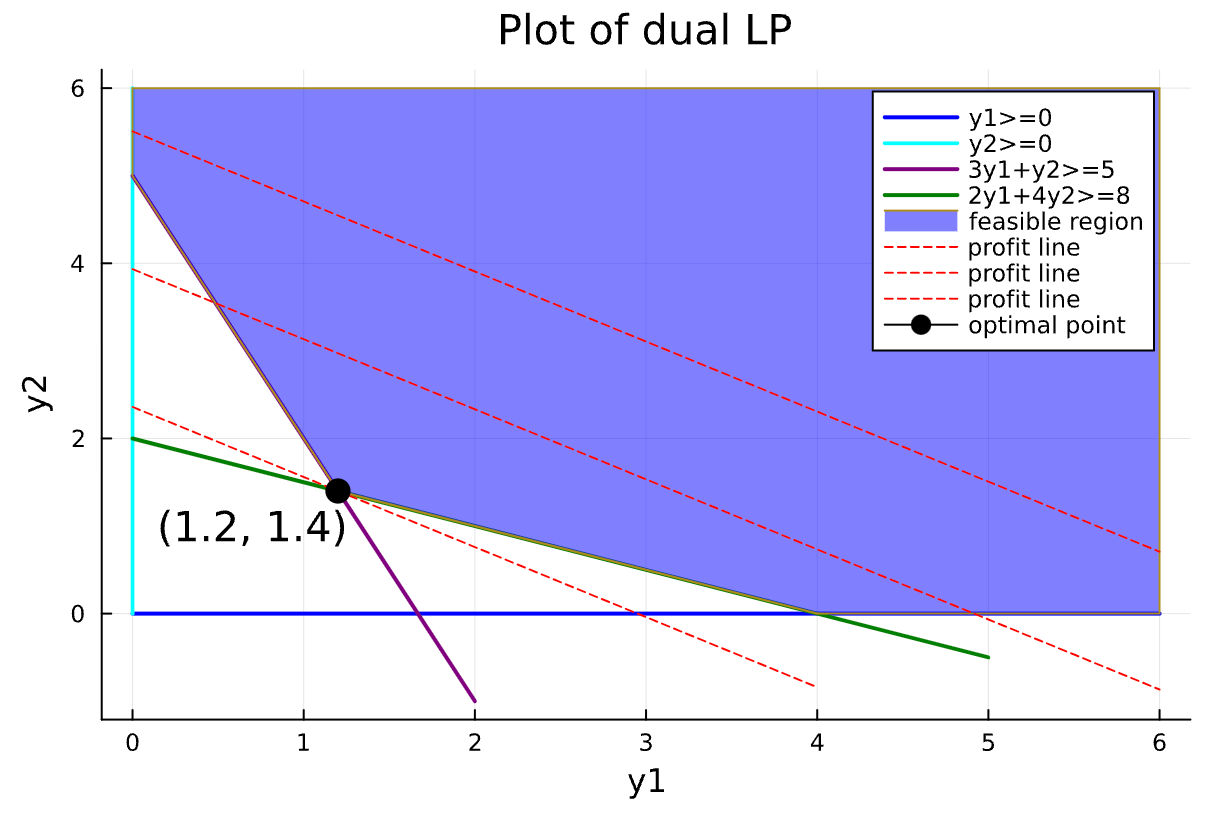